# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from pprint import pprint
import numpy as np
import datetime
import time
from scipy.stats import linregress
from citipy import citipy

# Remember to update the config file with your API key
from api_keys import weather_api_key

In [14]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Houston"
units = "imperial"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city +"&units=" + units

In [15]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 29.76, 'lon': -95.36},
 'dt': 1600298057,
 'id': 4699066,
 'main': {'feels_like': 88.23,
          'humidity': 49,
          'pressure': 1010,
          'temp': 89.49,
          'temp_max': 91,
          'temp_min': 87.01},
 'name': 'Houston',
 'sys': {'country': 'US',
         'id': 4850,
         'sunrise': 1600258017,
         'sunset': 1600302326,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'gust': 24.16, 'speed': 13.87}}


## Generate Cities List

In [16]:
#latitudes/longitudes list
locations = []
#cities list
cities = []

lats = np.random.uniform(low=-90, high=90, size=1500)
longs = np.random.uniform(low=-180, high=180, size=1500)
locations = zip(lats, longs)

for a in locations:
    city = citipy.nearest_city(a[0], a[1]).city_name
    
    #find unique city and add to the list in cities[]
    if city not in cities:
        cities.append(city)

len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query UßRL
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a4030e913748977ebcfc1f6b4a4df554&units=imperial&q=


In [18]:
num = 1

city_name = []
lat = []
long = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []

print("Beginning Data Retrieval")
print("---------------------------------")

for city in cities:
    try:
        city_data = (requests.get(query_url + city)).json()
        city_name.append(city_data["name"])
        lat.append(city_data["coord"]["lat"])
        long.append(city_data["coord"]["lon"])
        max_temp.append(city_data["main"]["temp_max"])
        humidity.append(city_data["main"]["humidity"])
        cloudiness.append(city_data["clouds"]["all"])
        wind_speed.append(city_data["wind"]["speed"])
        country.append(city_data["sys"]["country"])
        
        print(f"Processing Record {num} of Set | {city}")
        num = num + 1
    
    except KeyError:
        print(f"City not found. Skipping...")
        num = num + 1

print("-------------------------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set | ushuaia
Processing Record 2 of Set | thompson
Processing Record 3 of Set | bredasdorp
Processing Record 4 of Set | sitka
Processing Record 5 of Set | leningradskiy
Processing Record 6 of Set | lompoc
Processing Record 7 of Set | saldanha
Processing Record 8 of Set | vaini
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set | clyde river
Processing Record 12 of Set | atuona
Processing Record 13 of Set | busselton
Processing Record 14 of Set | meulaboh
Processing Record 15 of Set | kaitangata
Processing Record 16 of Set | hithadhoo
Processing Record 17 of Set | ancud
Processing Record 18 of Set | qaanaaq
Processing Record 19 of Set | grindavik
Processing Record 20 of Set | cape town
Processing Record 21 of Set | port elizabeth
City not found. Skipping...
Processing Record 23 of Set | codrington
City not found. Skipping...
Processing Record 25 of Set | carlsbad
Processin

Processing Record 210 of Set | muli
Processing Record 211 of Set | padang
Processing Record 212 of Set | flinders
City not found. Skipping...
Processing Record 214 of Set | georgetown
Processing Record 215 of Set | severo-kurilsk
Processing Record 216 of Set | talnakh
Processing Record 217 of Set | manzil salim
Processing Record 218 of Set | karaton
Processing Record 219 of Set | grand-santi
Processing Record 220 of Set | shelopugino
Processing Record 221 of Set | orlik
Processing Record 222 of Set | guerrero negro
City not found. Skipping...
Processing Record 224 of Set | yichun
Processing Record 225 of Set | bambous virieux
Processing Record 226 of Set | hurghada
Processing Record 227 of Set | lucapa
Processing Record 228 of Set | deputatskiy
Processing Record 229 of Set | lebu
Processing Record 230 of Set | vologda
Processing Record 231 of Set | atar
Processing Record 232 of Set | castro
Processing Record 233 of Set | dunedin
Processing Record 234 of Set | kokopo
Processing Record 2

Processing Record 423 of Set | milkovo
Processing Record 424 of Set | ahipara
Processing Record 425 of Set | port blair
Processing Record 426 of Set | isabela
City not found. Skipping...
City not found. Skipping...
Processing Record 429 of Set | caucaia
Processing Record 430 of Set | mazamari
Processing Record 431 of Set | ixtapa
Processing Record 432 of Set | rio gallegos
Processing Record 433 of Set | rio grande
Processing Record 434 of Set | tateyama
Processing Record 435 of Set | mogadishu
Processing Record 436 of Set | paracuru
Processing Record 437 of Set | kenai
Processing Record 438 of Set | sur
Processing Record 439 of Set | acarau
Processing Record 440 of Set | sakakah
Processing Record 441 of Set | kijang
Processing Record 442 of Set | sapa
Processing Record 443 of Set | altamont
Processing Record 444 of Set | sokoto
Processing Record 445 of Set | rosario oeste
Processing Record 446 of Set | cairns
Processing Record 447 of Set | san rafael
City not found. Skipping...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": long, "Max Temp": max_temp,
                  "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                  "Country": country})

pd.DataFrame.to_csv(df, "weatherpy.csv")
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,39.20,60,40,21.92,AR
1,Thompson,55.74,-97.86,42.80,38,40,16.11,CA
2,Bredasdorp,-34.53,20.04,51.80,87,16,5.82,ZA
3,Sitka,57.05,-135.33,57.20,67,1,4.70,US
4,Leningradskiy,69.38,178.42,37.02,91,100,15.26,RU


In [20]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000
mean,19.387532,21.122306,65.812270,72.553153,50.309910,8.238036
std,33.460292,89.509912,15.078341,20.170625,38.964408,5.451060
min,-54.800000,-175.200000,16.810000,6.000000,0.000000,0.220000
25%,-8.025000,-55.790000,52.865000,63.000000,7.000000,4.120000
50%,21.460000,24.730000,67.140000,77.000000,51.000000,6.930000
75%,46.700000,102.385000,77.925000,88.000000,90.000000,11.410000
max,78.220000,178.420000,108.000000,100.000000,100.000000,27.960000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
check_humidity = df[df["Humidity"]>100.00]
check_humidity
#there are no cities where the humidity > 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country


In [22]:
#  Get the indices of cities that have humidity over 100%.


In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

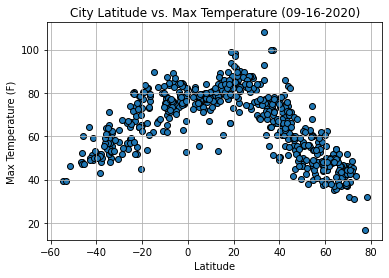

In [26]:
plt.scatter(df["Lat"], df["Max Temp"], marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Max Temperature ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("Temp Plot")
plt.show()

## Latitude vs. Humidity Plot

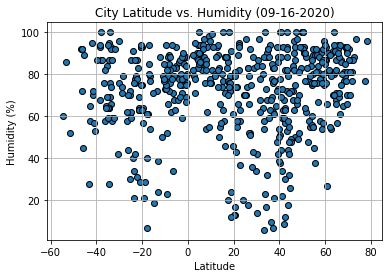

In [27]:
plt.scatter(df["Lat"], df["Humidity"], marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Humidity ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

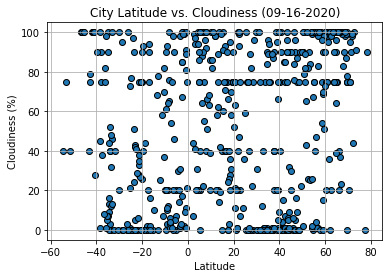

In [28]:
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Cloudiness ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

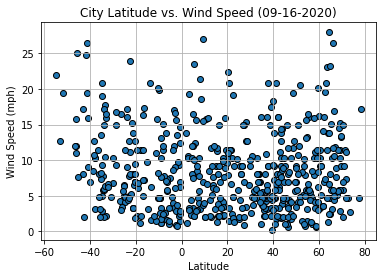

In [29]:
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", edgecolor='black')
plt.title(f"City Latitude vs. Wind Speed ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("Wind Speed Plot")
plt.show()

## Linear Regression

In [31]:
north = df.loc[df["Lat"] >=0]
north.reset_index(inplace=True)

south = df.loc[df["Lat"]<0]
south.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

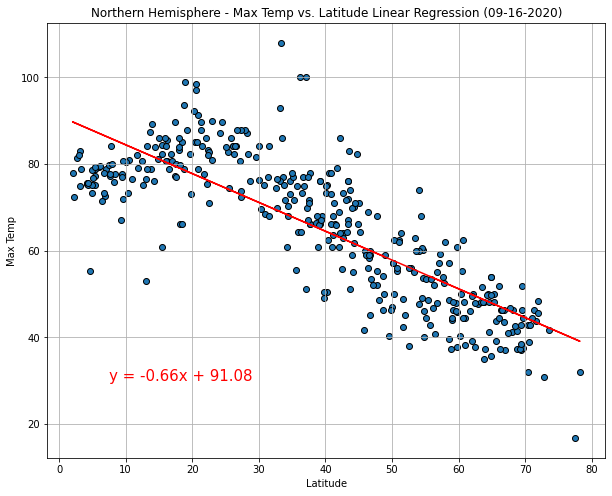

The r-squared is: 0.6673923413464099


In [37]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Max Temp"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("NH - temp vs latitude")
plt.show()
          
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

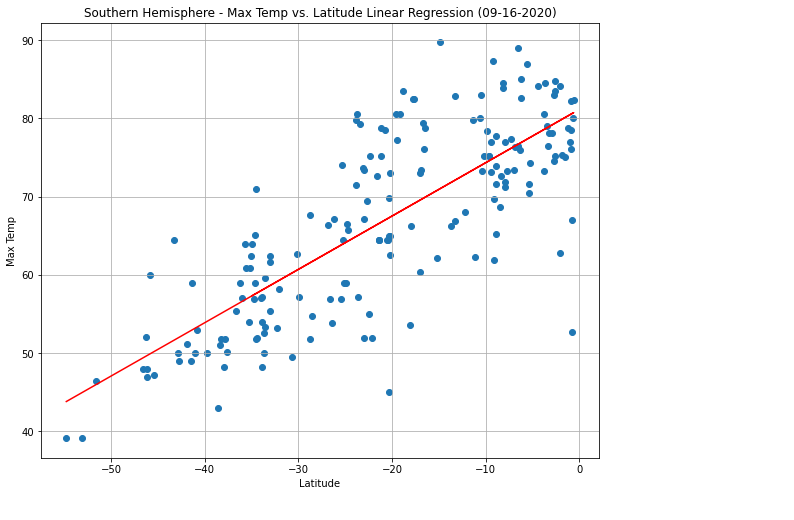

The r-squared is: 0.6169353967333044


In [38]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Max Temp"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values)
plt.plot(x_values, regression_values, "red", marker="o", edgecolor='black')
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("SH - temp vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

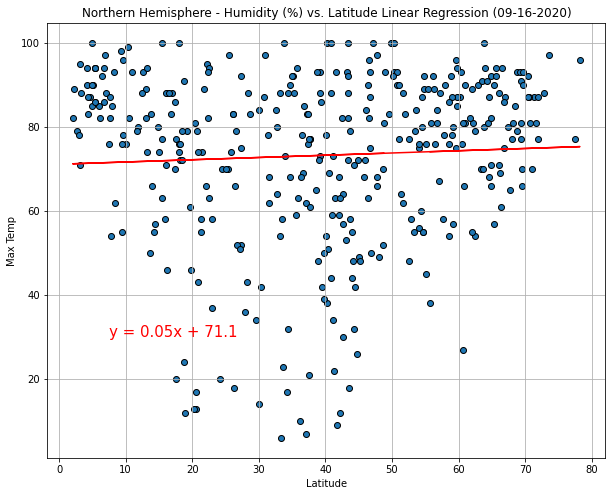

The r-squared is: 0.002673327306640818


In [39]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Humidity"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("NH - humidity vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

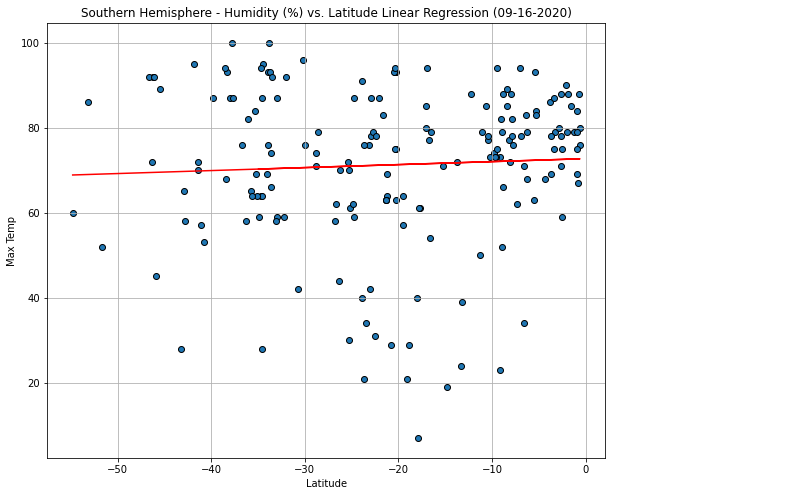

The r-squared is: 0.002677000648207104


In [40]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Humidity"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("SH - humidity vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

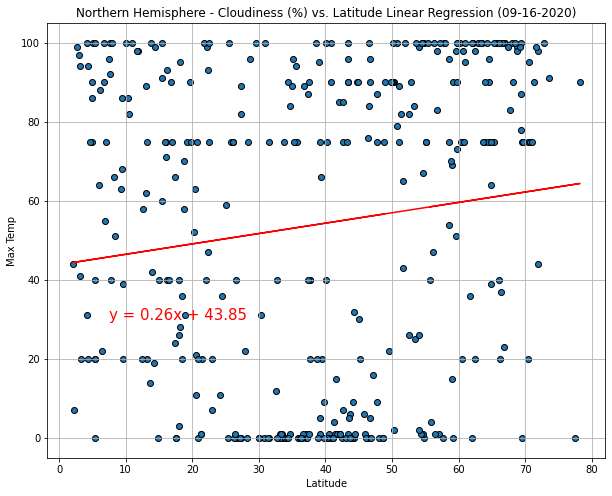

The r-squared is: 0.018279103845351006


In [41]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Cloudiness"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("NH - cloudiness vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

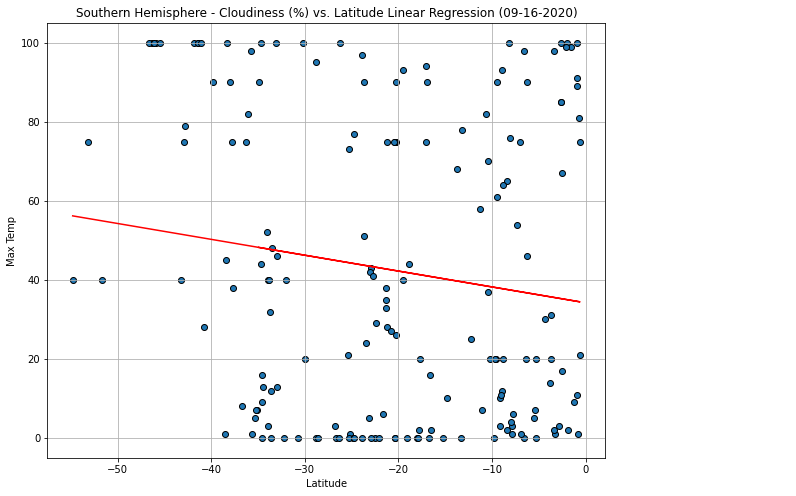

The r-squared is: 0.02159823919858609


In [42]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Cloudiness"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("SH - cloudiness vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

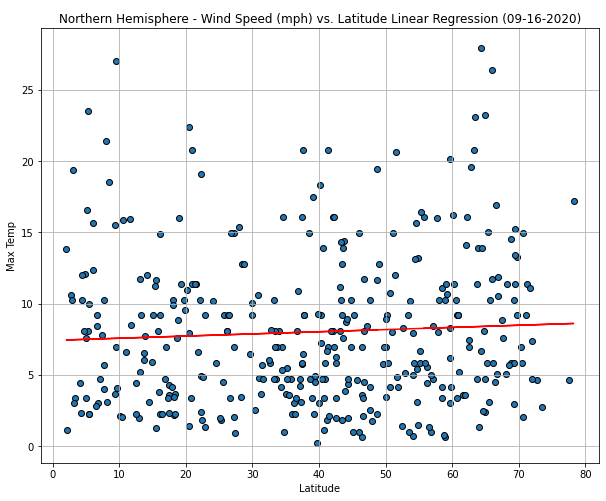

The r-squared is: 0.0033305495460041047


In [43]:
x_values = pd.to_numeric(north["Lat"])
y_values = pd.to_numeric(north["Wind Speed"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("NH - wind speed vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

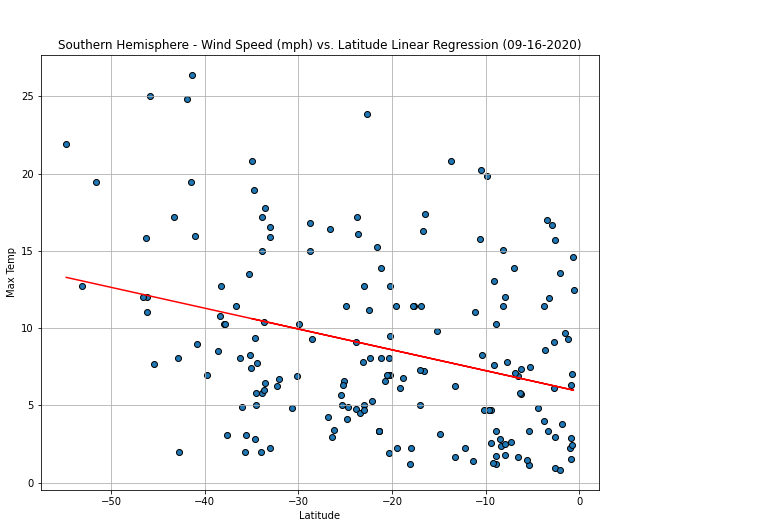

The r-squared is: 0.10452916476763628


In [45]:
x_values = pd.to_numeric(south["Lat"])
y_values = pd.to_numeric(south["Wind Speed"])

slope, intercept, rvalue, pvalue, stedrr = linregress(x_values, y_values)

regression_values = x_values * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot observations
# Plot the regression line
# Annotate the plot with the linear equation
plt.figure(figsize=(10,8))

plt.scatter(x_values, y_values, marker="o", edgecolor='black')
plt.plot(x_values, regression_values, "red")
plt.annotate(line_eq, (7.5, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({datetime.date.today().strftime('%m-%d-%Y')})")
plt.grid(True)

plt.savefig("SH - wind speed vs latitude Plot")
plt.show()

print(f"The r-squared is: {rvalue**2}")